[14.44573004 13.87149041 12.88303348 12.06349511 10.97941722 10.19985543
  9.30066774  8.92984045  8.00690131  7.46551595  6.65164792  5.80684161
  5.36280362  4.61120513  3.73823408  3.16125791  2.71206068  1.9342005
  1.24867046  1.09268866  0.15358076  0.31402697  0.63853018  1.03159233
  1.89990677  2.03904515  2.34856846  2.76400138  3.53483802  3.79040151
  4.25155028  4.55429969  4.7809955   5.30488699  5.29504395  5.65124473
  6.0413744   6.16937959  6.50642082  6.5616911   6.80474859  6.63682252
  6.87130712  7.02749962  7.03014928  7.19609638  7.20164931  7.34358305
  7.55788612  7.43990764  7.44202969  7.34314037  7.33532342  7.61560946
  7.39874751  7.28874297  6.96119445  7.11363617  6.68622168  6.6316958
  6.75617741  6.38286327  6.12478591  5.95406582  5.78063231  5.47665395
  4.91462569  4.50959943  4.32672348  3.96031505  3.57138369  3.55879477
  3.12897138  2.43357416  2.17140221  1.59094648  1.38185198  0.66745176
  0.06591357  0.46576511  0.84894714  1.55681275  1.9

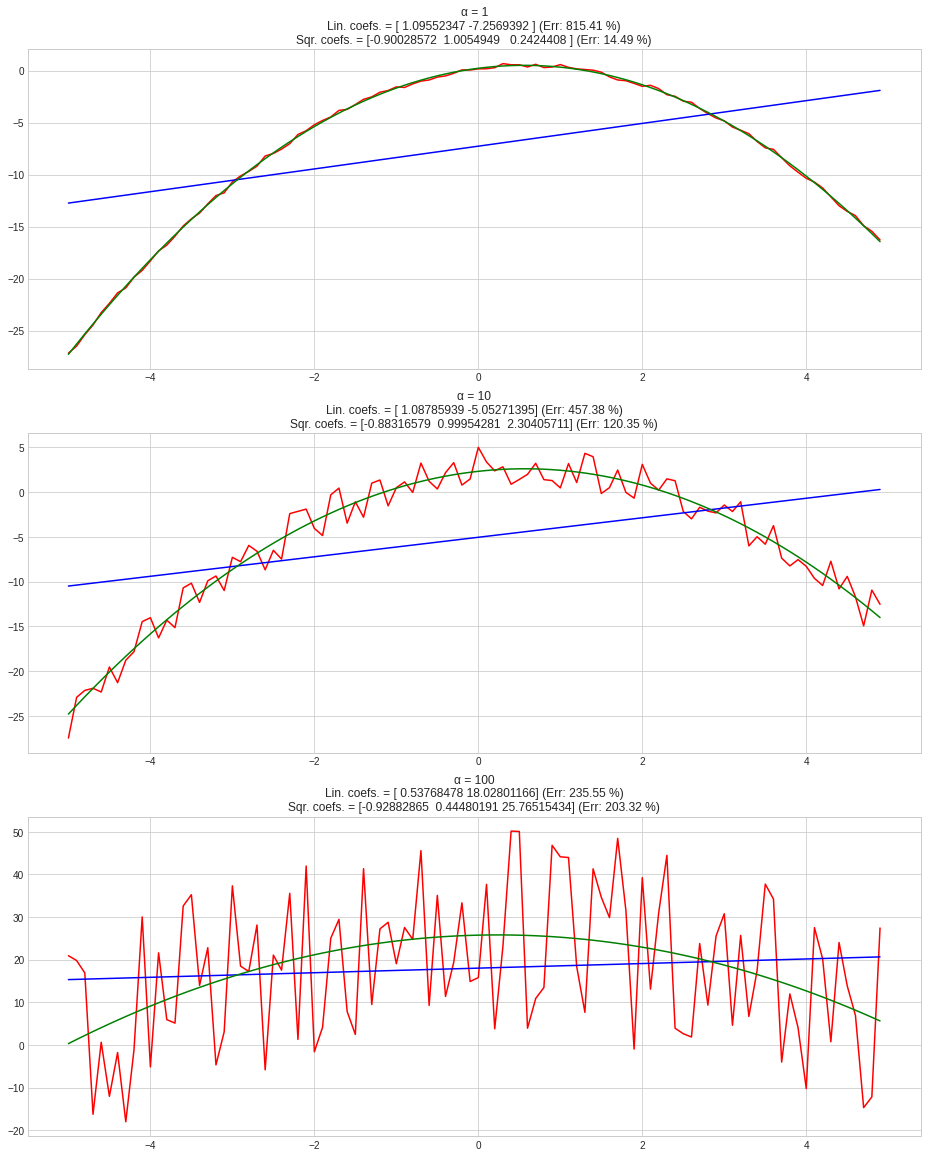

In [91]:
import matplotlib.pyplot as plt
import random
import numpy as np

plt.style.use('seaborn-whitegrid')
random.seed(42)

func = lambda x: x - 0.9*x**2

def func_factory(α):
    return lambda x: func(x) + α * random.random()*0.5

X = list(np.arange(-5, 5, 0.1))
Y1 = [func_factory(1)(x) for x in X]
Y2 = [func_factory(10)(x) for x in X]
Y3 = [func_factory(100)(x) for x in X]

Ys = [Y1, Y2, Y3]
def get_poli_func(alphas):
    assert len(alphas) > 1 and len(alphas) < 4
    if len(alphas) == 3:
        return lambda x: alphas[0]*x**2+alphas[1]*x+alphas[2]
    return lambda x: alphas[0]*x+alphas[1]

def lstsq(A, y):
    return np.linalg.lstsq(A, y, rcond=None)[0]

def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean()

def error(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    print(np.absolute(np.subtract(actual, pred)))
    return (np.absolute(np.subtract(actual, pred) / actual)).mean() * 100

lin_apprxs, sqr_apprxs = [], []
lin_coefs, sqr_coefs = [], []
lin_mses, sqr_mses = [], []
for Y in Ys:
    A_sqr = np.array([[x**2, x, 1] for x in X])
    A_lin = A_sqr[:, 1:]
    lin_coefs.append(lstsq(A_lin, Y))
    sqr_coefs.append(lstsq(A_sqr, Y))
    lin_apprxs.append([get_poli_func(lin_coefs[-1])(x) for x in X])
    sqr_apprxs.append([get_poli_func(sqr_coefs[-1])(x) for x in X])
    
    lin_mses.append(error(Y, lin_apprxs[-1]))
    sqr_mses.append(error(Y, sqr_apprxs[-1]))

fig, axs = plt.subplots(3, figsize=(16, 20))

for i in range(len(Ys)):
    axs[i].set_title("α = 1"+i*"0" + 
                     f"\nLin. coefs. = {str(lin_coefs[i])} (Err: {lin_mses[i]:.2f} %)" +
                     f"\nSqr. coefs. = {str(sqr_coefs[i])} (Err: {sqr_mses[i]:.2f} %)")
                     
    axs[i].plot(X, Ys[i], color="red")
    axs[i].plot(X, lin_apprxs[i], color="blue")
    axs[i].plot(X, sqr_apprxs[i], color="green")